# Investigation of the Wisconsin Breast Cancer dataset.

### Problem Statement:<br>
This project will investigate the Wisconsin Breast Cancer dataset. With a focus on the following:<br>

* Undertake an analysis/review of the dataset and present an overview and background.<br>
* Provide a literature review on classifiers which have been applied to the dataset and compare their performance.<br>
* Present a statistical analysis of the dataset.<br>
* Using a range of machine learning algorithms, train a set of classifiers on the dataset (using SKLearn etc.) and present classification performance results. Detail your rationale for the parameter selections you made while training the classifiers.<br>
* Compare, contrast and critique your results with reference to the literature.<br>
* Discuss and investigate how the dataset could be extended – using data synthesis of new tumour datapoints.<br>

### Breast Cancer:

Breast cancer is one of the most common types of cancer in women, it occurs in every country of the world and in women at any age after puberty but with increasing rates in later life. Breast cancer treatment can be highly effective, especially when the disease is identified early. This dataset is extremely important as it offers so much versatility in reseach and analysis which could significantly assist in the treatment of this disease.

This assignment presents a statistical analysis of the dataset.

### Background on the Dataset:

Dataset Title: Wisconsin Breast Cancer Database (January 8, 1991)<br>
Source: Dr. WIlliam H. Wolberg (physician), University of Wisconsin Hospitals, Madison, Wisconsin, USA<br>

(Please note, full citation found in Readme file)

Data Set Characteristics: Multivariate
Number of Instances: 699
Area: Life
Attribute Characteristics: Integer
Number of Attributes: 10

### Attributes

Dataset (original Attiributes):

1. Sample code number: id number
2. Clump Thickness: 1 - 10
3. Uniformity of Cell Size: 1 - 10
4. Uniformity of Cell Shape: 1 - 10
5. Marginal Adhesion: 1 - 10
6. Single Epithelial Cell Size: 1 - 10
7. Bare Nuclei: 1 - 10
8. Bland Chromatin: 1 - 10
9. Normal Nucleoli: 1 - 10
10. Mitoses: 1 - 10
11. Class: (2 for benign, 4 for malignant)

Per Dataset documentation;

Missing attribute values: 16

There are 16 instances in Groups 1 to 6 that contain a single missing 
(i.e., unavailable) attribute value, now denoted by "?".

What is breast cancer?

Breast cancer is when cells in your breast change and grow in an abnormal way. A group of these cancer cells can form a tumour.

In [23]:
# Step 1: Import dataset and required libraries:

# NumPy for numerical operations
import numpy as np

# Pandas for data analysis
import pandas as pd

# pandas plotting
from pandas.plotting import scatter_matrix

# seaborn
import seaborn as sns

# random
import random

from scipy.stats import norm

# Statistics for descriptive statistics
import statistics

# Matplotlib.pyplot for plotting
import matplotlib.pyplot as plt

# Other plotting
from scipy.stats import spearmanr
from scipy.cluster import hierarchy
from scipy.spatial.distance import squareform

# sklearn
import sklearn.neighbors as nei
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import  cross_val_score
from sklearn import preprocessing
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import permutation_importance

import pickle

from collections import defaultdict

# importing the dataset:

# Creating file path variable:
file_path = "..\PfDA_2\wbc.data"

# above .data file is comma delimited 
wbc_data = pd.read_csv(file_path, delimiter=",")

# Define columns in wbc_data
wbc_data.columns = ["Sample ID Number", "Clump Thickness", "Uniformity of Cell Size", "Uniformity of Cell Shape", "Marginal Adhesion", "Single Epithelial Cell Size", "Bare Nuclei", "Bland Chromatin", "Normal Nucleoli", "Mitosis", "Class"]

In [3]:
# # read the top/head of the dataset

wbc_data.head()

,Sample ID Number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitosis,Class
0,1002945,5,4,4,5,7,10,3,2,1,2
1,1015425,3,1,1,1,2,2,3,1,1,2
2,1016277,6,8,8,1,3,4,3,7,1,2
3,1017023,4,1,1,3,2,1,3,1,1,2
4,1017122,8,10,10,8,7,10,9,7,1,4


In [4]:
# read the foot/tail of the dataset

wbc_data.tail()

,Sample ID Number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitosis,Class
693,776715,3,1,1,1,3,2,1,1,1,2
694,841769,2,1,1,1,2,1,1,1,1,2
695,888820,5,10,10,3,7,3,8,10,2,4
696,897471,4,8,6,4,3,4,10,6,1,4
697,897471,4,8,8,5,4,5,10,4,1,4


In [5]:
# Statistical analysis of the dataset using describe()

wbc_data.describe()

,Sample ID Number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bland Chromatin,Normal Nucleoli,Mitosis,Class
count,6.980000e+02,698.000000,698.000000,698.000000,698.000000,698.000000,698.000000,698.000000,698.000000,698.000000
mean,1.071807e+06,4.416905,3.137536,3.210602,2.809456,3.217765,3.438395,2.869628,1.590258,2.690544
std,6.175323e+05,2.817673,3.052575,2.972867,2.856606,2.215408,2.440056,3.055004,1.716162,0.951596
min,6.163400e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,8.702582e+05,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,2.000000
50%,1.171710e+06,4.000000,1.000000,1.000000,1.000000,2.000000,3.000000,1.000000,1.000000,2.000000
75%,1.238354e+06,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,4.000000,1.000000,4.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


In [6]:
# Must check for any null values

wbc_data.isnull().sum()

Sample ID Number               0
Clump Thickness                0
Uniformity of Cell Size        0
Uniformity of Cell Shape       0
Marginal Adhesion              0
Single Epithelial Cell Size    0
Bare Nuclei                    0
Bland Chromatin                0
Normal Nucleoli                0
Mitosis                        0
Class                          0
dtype: int64

In [7]:
# Check the datatypes:

print(wbc_data.dtypes)

Sample ID Number                int64
Clump Thickness                 int64
Uniformity of Cell Size         int64
Uniformity of Cell Shape        int64
Marginal Adhesion               int64
Single Epithelial Cell Size     int64
Bare Nuclei                    object
Bland Chromatin                 int64
Normal Nucleoli                 int64
Mitosis                         int64
Class                           int64
dtype: object


In [8]:
# Check shape of dataset

print (wbc_data.shape)

(698, 11)


In [9]:
# Sample ID number is not relevant to this analysis therefore it was identified to be removed.

dummy_field = ["Sample ID Number"]

wbc_data = wbc_data.drop(dummy_field, axis=1)

In [10]:
# Checking dataset to ensure "Sample ID Number" has been dropped

wbc_data.head()

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitosis,Class
0,5,4,4,5,7,10,3,2,1,2
1,3,1,1,1,2,2,3,1,1,2
2,6,8,8,1,3,4,3,7,1,2
3,4,1,1,3,2,1,3,1,1,2
4,8,10,10,8,7,10,9,7,1,4


In [25]:
wbc_data.replace('?',-99999, inplace = True)
print(wbc_data.axes)
wbc_data.shape

[RangeIndex(start=0, stop=698, step=1), Index(['Sample ID Number', 'Clump Thickness', 'Uniformity of Cell Size',
       'Uniformity of Cell Shape', 'Marginal Adhesion',
       'Single Epithelial Cell Size', 'Bare Nuclei', 'Bland Chromatin',
       'Normal Nucleoli', 'Mitosis', 'Class'],
      dtype='object')]


(698, 11)

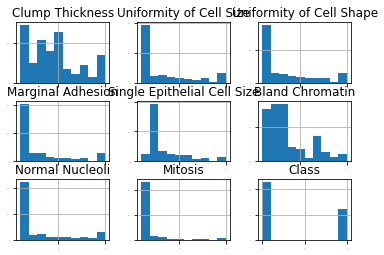

In [11]:
# Plotting some histograms focusing on Mitosis.

wbc_data.hist(sharex=False, sharey=False, xlabelsize=1, ylabelsize=1)

# plt.show()

data_df = list(wbc_data.columns[0:10])

X = wbc_data.loc[:, data_df]
y = wbc_data["Mitosis"]

# Test options and evaluation metric
num_folds = 10
seed = 7
scoring = 'accuracy'

[]

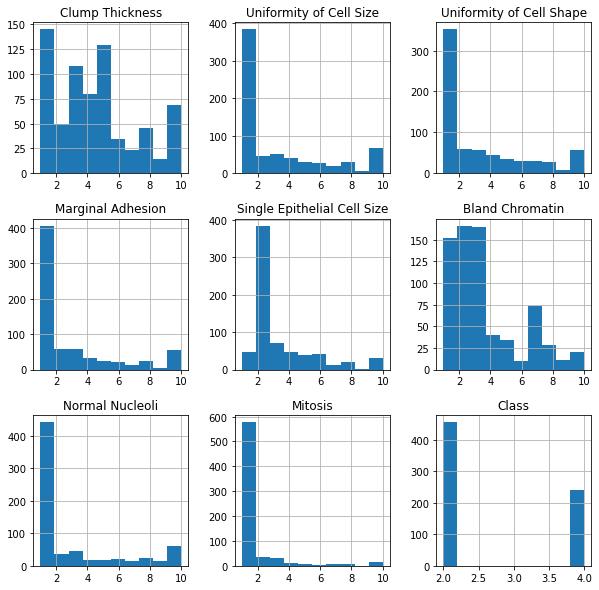

In [12]:
# Plot histograms

wbc_data.hist(figsize=[10,10])
plt.plot()

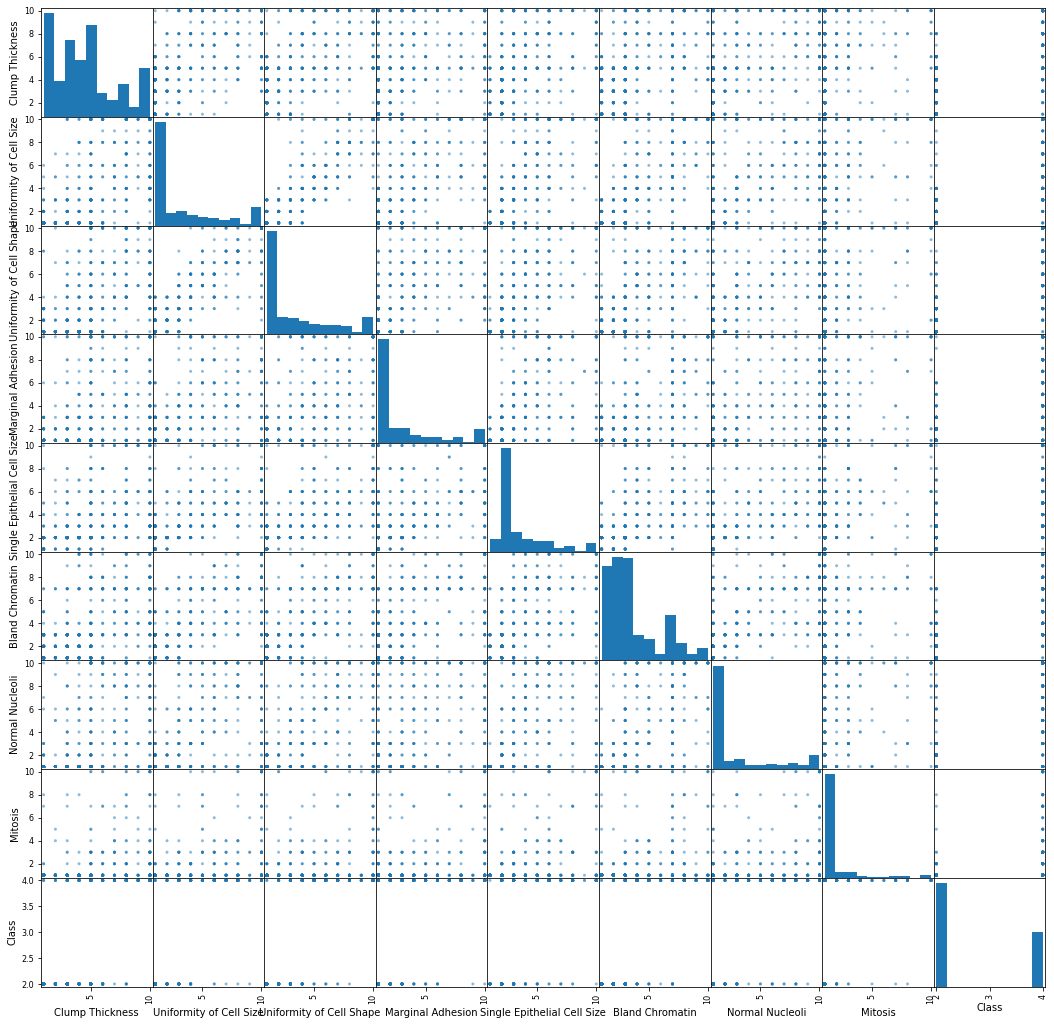

In [31]:
scatter_matrix(wbc_data,figsize=(18,18))
plt.show()

Modeling

In [36]:
# Need to review the data types again in order to allow for modeling and make any adjustments:

wbc_data.dtypes
wbc_data["Bare Nuclei"]=pd.to_numeric(wbc_data["Bare Nuclei"],downcast='integer')

In [37]:
# reviewing the data types

wbc_data.dtypes

Sample ID Number               int64
Clump Thickness                int64
Uniformity of Cell Size        int64
Uniformity of Cell Shape       int64
Marginal Adhesion              int64
Single Epithelial Cell Size    int64
Bare Nuclei                    int32
Bland Chromatin                int64
Normal Nucleoli                int64
Mitosis                        int64
Class                          int64
dtype: object

In [41]:
# Dropping "Class" as it is not required for this model

X= wbc_data.drop(["Class"],axis=1)
y= wbc_data["Class"]

Train-Test Split

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2)

In [43]:
seed=8
scoring = 'accuracy'

Model

In [44]:
models=[]
models.append(('KNN',KNeighborsClassifier(n_neighbors=5)))
models.append(('SVM',SVC()))    
print(models)

[('KNN', KNeighborsClassifier()), ('SVM', SVC())]


In [48]:
# Using Sklearn nearest neighbors:

model1=KNeighborsClassifier(n_neighbors=5)
model1.fit(X_train, y_train)
pickle.dump(model1, open('model1.pkl','wb'))

#model1 = pickle.load(open('model1.pkl','rb'))

In [46]:
predictions=model1.predict(X_test)
print(accuracy_score(y_test,predictions))
print(classification_report(y_test, predictions))

0.6
              precision    recall  f1-score   support

           2       0.66      0.76      0.71        89
           4       0.43      0.31      0.36        51

    accuracy                           0.60       140
   macro avg       0.55      0.54      0.54       140
weighted avg       0.58      0.60      0.58       140



In [50]:
model = pickle.load(open('model1.pkl','rb'))
output = model.predict([[4, 1, 1, 3, 2, 1, 3, 1, 1]])
print(output[0])

ValueError: query data dimension must match training data dimension

In [14]:
# Random Forest Classsifier

data = load_breast_cancer()
X, y = data.data, data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)
print("Accuracy on test data: {:.2f}".format(clf.score(X_test, y_test)))

Accuracy on test data: 0.97


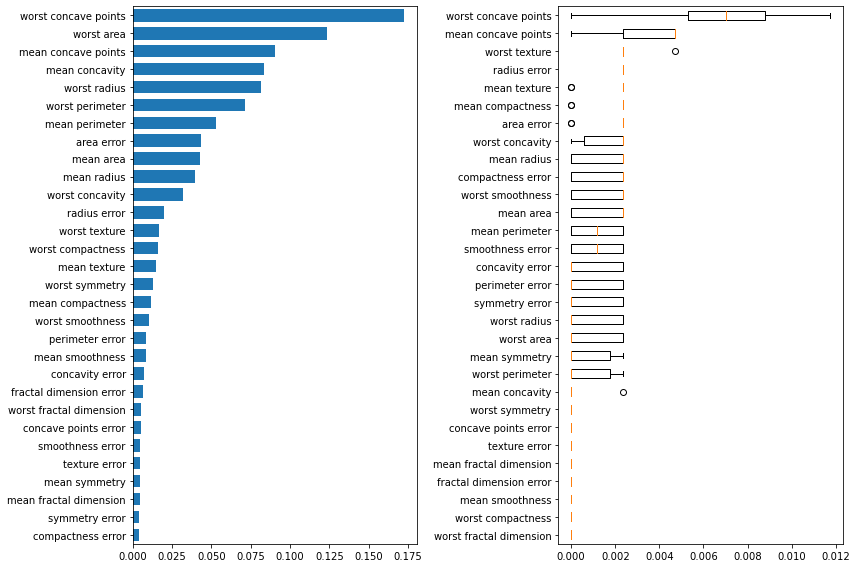

In [15]:
result = permutation_importance(clf, X_train, y_train, n_repeats=10, random_state=42)
perm_sorted_idx = result.importances_mean.argsort()

tree_importance_sorted_idx = np.argsort(clf.feature_importances_)
tree_indices = np.arange(0, len(clf.feature_importances_)) + 0.5

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 8))
ax1.barh(tree_indices, clf.feature_importances_[tree_importance_sorted_idx], height=0.7)
ax1.set_yticks(tree_indices)
ax1.set_yticklabels(data.feature_names[tree_importance_sorted_idx])
ax1.set_ylim((0, len(clf.feature_importances_)))
ax2.boxplot(
    result.importances[perm_sorted_idx].T,
    vert=False,
    labels=data.feature_names[perm_sorted_idx],
)
fig.tight_layout()
plt.show()

### Literature Review:

As noted by Lavanya, D in 'Analysis of Feature Selection with Classification: Breast Cancer Datasets'; "Feature Selection increases the accuracy of the Classifier because it eliminates irrelevant attributes", Classifiers can play a major part in understanding a dataset. With the use of machine learning classifiers can be trained in order for researchers to conduct essential studies and research.

Additionally, Siham, M et al in 'Analysis of Breast Cancer Detection Using Different Machine Learning Techniques'; "In order to minimize the bias associated with the random sampling of the training data, we use 10 fold cross validation after the pre-processing phase. In k-fold cross-validation, the original dataset is randomly partitioned into k equal size subsets." Attention to detail must be paid attention to with the random sampling of the training data.

### Conclusion: